# Espacios de color

Manipulación y cambio de espacio

In [5]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [2]:
# Veamos las transformaciones posibles

flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

In [3]:
# Ejercicio: extraer los píxeles del tablero (color verde)
# Primera parte: encontrar un espacio de color conveniente para la discriminación

img_color = cv.imread('imgBloque1.bmp')

imgHSV = cv.cvtColor(img_color,cv.COLOR_BGR2HSV)

plt.imshow(img_color[:,:,::-1])
plt.show()

idx_col = 350
perfil_color = imgHSV[:,idx_col]
plt.plot(perfil_color[:,0],color='r',label='H')
plt.plot(perfil_color[:,1],color='g',label='S')
plt.plot(perfil_color[:,2],color='b',label='V')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,480)
plt.ylim(0,255)
plt.legend()
plt.show()


plt.figure()
plt.imshow(img_color,cmap='gray')
plt.show()


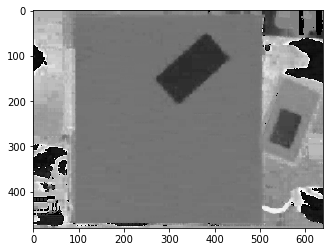

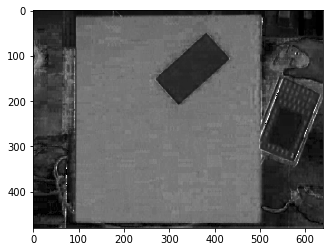

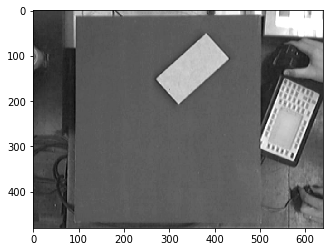

In [6]:
im_h,im_s,im_v = cv.split(imgHSV)

# La curva de Hue, discrimina fácilmente el color del tablero de los colores del fondo
plt.imshow(im_h,cmap='gray')
plt.show()

# Puedo complementar con la curva de saturación, ya que ambas son muy uniformes sobre el tablero
plt.imshow(im_s,cmap='gray')
plt.show()

# La imagen de intensidad (V) permite discriminar fácilmente el bloque del tablero, pero confunde el tablero con el fondo
plt.imshow(im_v,cmap='gray')
plt.show()


In [61]:
# Ejercicio: mostrar la imágen binarizada del tablero (blanco) y el resto (negro)
muestra = imgHSV[300:350,300:350,:]

color_medio = cv.mean(muestra)
print(color_medio)

muestra = cv.cvtColor(muestra,cv.COLOR_HSV2BGR)
muestra = cv.cvtColor(muestra,cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(muestra,cmap='gray')
plt.show()

(81.47200000000001, 121.07440000000001, 94.3524, 0.0)


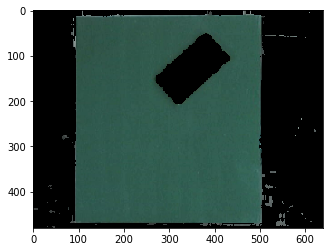

In [9]:

val_h_medio = color_medio[0]
color_l = (val_h_medio-10,10,10)
color_u = (val_h_medio+10,150,150)

mask = cv.inRange(imgHSV, color_l,  color_u)
img_segmentada = cv.bitwise_and(img_color, img_color, mask=mask)

plt.imshow(img_segmentada[:,:,::-1])
plt.show()
